<a href="https://colab.research.google.com/github/i4ata/NN_TBP/blob/main/data_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Generator

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import csv
import pandas as pd
import os

The discrete time step, masses of bodies, and gravitational constant are fixed for all data points

In [2]:
step = 0.001
max_t = 5
M = [1,1,1]
G = 1

This function calculates the acceleration of each of the three bodies in the current time step

In [3]:
def compute_acceleration(x,y,M,ax,ay,G):
    for j in range(3):

        dx = np.array(x[j] - x).transpose()
        dy = np.array(y[j] - y).transpose()

        d = np.power(np.sqrt( np.power(dx,2) + np.power(dy,2)),3)
        
        for k in range(3):
            if d[k] == 0:
                ax[k,j] = 0
                ay[k,j] = 0
            else:
                ax[k,j] = -dx[k]*M[k]*G / d[k]
                ay[k,j] = -dy[k]*M[k]*G / d[k]

        ax_tot = np.sum(ax, axis=0)
        ay_tot = np.sum(ay, axis=0)

    return ax_tot, ay_tot

This function is used to calculate the trajectories of the three bodies for the whole duration of the simulation

In [4]:
def verlet_method(max_t = 5, step = 0.001, M = [1,1,1], G = 1, x1 = 0, y1 = 0, vx1 = 0, vy1 = 0, x2 = 0, y2 = 0, vx2 = 0, vy2 = 0, x3 = 0, y3 = 0, vx3 = 0, vy3 = 0):
    t = np.arange(0,max_t,step)
    
    x = np.array([[0 for x in range(3)] for y in range(len(t))], dtype='f')
    y = np.array([[0 for x in range(3)] for y in range(len(t))], dtype='f')

    vx = np.array([[0 for x in range(3)] for y in range(len(t))], dtype='f')
    vy = np.array([[0 for x in range(3)] for y in range(len(t))], dtype='f')

    ax = np.array([[0 for x in range(3)] for y in range(3)], dtype='f')
    ay = np.array([[0 for x in range(3)] for y in range(3)], dtype='f')

    x[0][0] = x1
    x[0][1] = x2
    x[0][2] = x3 

    y[0][0] = y1
    y[0][1] = y2
    y[0][2] = y3

    vx[0][0] = vx1
    vx[0][1] = vx2
    vx[0][2] = vx3 

    vy[0][0] = vy1
    vy[0][1] = vy2
    vy[0][2] = vy3 

    for i in range(len(t)-1):
        ax_tot, ay_tot = compute_acceleration(x[i], y[i], M, ax, ay, G)

        x[i+1] = x[i] + step*vx[i] + (ax_tot * step * step)/2
        y[i+1] = y[i] + step*vy[i] + (ay_tot * step * step)/2

        ax_tot_next, ay_tot_next = compute_acceleration(x[i+1], y[i+1], M, ax, ay, G)

        vx[i+1] = vx[i] + step * (ax_tot + ax_tot_next) / 2
        vy[i+1] = vy[i] + step * (ay_tot + ay_tot_next) / 2

    return x, y, vx, vy

This function nicely plots the resulting trajectories

In [5]:
def plot(x,y):
    Body1, = plt.plot(x[:,0], y[:,0], color = 'green')
    Body2, = plt.plot(x[:,1], y[:,1], color = 'blue')
    Body3, = plt.plot(x[:,2], y[:,2], color = 'red')
    plt.scatter(x[0][0], y[0][0], color = 'green')
    plt.scatter(x[0][1], y[0][1], color = 'blue')
    plt.scatter(x[0][2], y[0][2], color = 'red')
    plt.grid()
    plt.xlim(np.amin(x) - 0.2, np.amax(x) + 0.2)
    plt.ylim(np.amin(y) - 0.2, np.amax(y) + 0.2)

    plt.title("2D TBP for " + str(len(x)) + " time steps using verlet method")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend([Body1, Body2, Body3],['Body 1','Body 2','Body 3'])
    plt.show()

The example from the Matlab file on Nestor shown for demonstration:

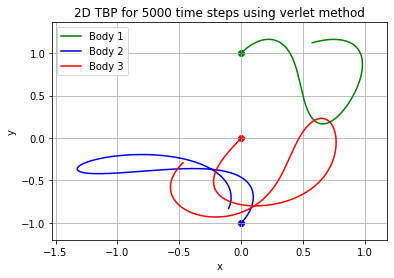

In [6]:
x1 = 0
y1 = 1
x2 = -x1 
y2 = -y1  
x3 = 0
y3 = 0 

vx1 =  0.3471; 
vy1 =  0.5327;  
vx2 = vx1; 
vy2 = vy1;
vx3 = -2*vx1 
vy3 = -2*vy1 

x,y,vx,vy = verlet_method(max_t, step, M, G, x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3)

plot(x,y)

These functions are used to define the starting positions and velocities of the bodies. The velocities are random 2D vectors with numbers between -0.5 and 0.5. The positions are visualized in the next cell

In [7]:
def get_random_position(sector):
    theta = np.random.uniform(2*sector*math.pi/3,2*(sector+1)*math.pi/3)
    r = np.random.uniform(1.5,2)
    return math.cos(theta)*r, math.sin(theta)*r

def get_random_velocities():
    return_array = []
    for i in range(6):
        return_array.append(np.random.uniform(-0.5,0.5))
    return return_array
    

This is a visualization of the distribution of the starting positions of the three bodies. Every body's starting location is in its own colored region of the plot shown below

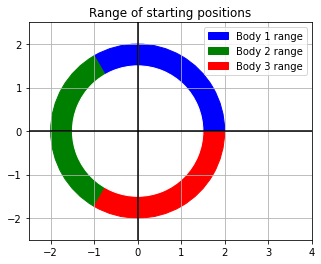

In [8]:
fig, ax = plt.subplots(1) 

ax.grid(True)
plt.axhline(linewidth=1.5, color='black')
plt.axvline(linewidth=1.5, color='black')

ax.add_artist(mpatches.Wedge((0,0), 2, 0, 120, fc='blue', edgecolor='blue'))
ax.add_artist(mpatches.Wedge((0,0), 2, 120, 240, fc='green', edgecolor='green'))
ax.add_artist(mpatches.Wedge((0,0), 2, 240, 360, fc='red', edgecolor='red'))
ax.add_artist(mpatches.Wedge((0,0), 1.5, 0, 360, fc='white', edgecolor = 'white'))

ax.set_xlim(-2.5, 4)
ax.set_ylim(-2.5, 2.5)
ax.set_aspect(1)

plt.title('Range of starting positions') 
ax.legend(handles=[mpatches.Patch(color='blue', label='Body 1 range'), mpatches.Patch(color='green', label='Body 2 range'), mpatches.Patch(color='red', label='Body 3 range')])

plt.show() 

This cell calculates the energy of the system

In [9]:
def get_kinetic_energy(mass, v1, v2):
    velocity = np.sqrt(v1*v1 + v2*v2)
    return mass*velocity*velocity/2

def get_potential_energy(x1, y1, m1, x2, y2, m2, G):
    distance = np.sqrt((y2-y1)*(y2-y1) + (x2-x1)*(x2-x1))
    return G*m1*m2/distance

def get_energy(x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3, M, G):
    total_kinetic =  get_kinetic_energy(M[0],vx1,vy1) + get_kinetic_energy(M[1],vx2,vy2) + get_kinetic_energy(M[2],vx3,vy3)
    total_potential = get_potential_energy(x1,y1,M[0],x2,y2,M[1],G) + get_potential_energy(x1,y1,M[0],x3,y3,M[2],G) + get_potential_energy(x2,y2,M[1],x3,y3,M[2],G)
    return total_kinetic - total_potential


This initializes the positions and velocities

In [10]:
x1,y1 = get_random_position(0)
x2,y2 = get_random_position(1)
x3,y3 = get_random_position(2)

vx1, vy1, vx2, vy2, vx3, vy3 = get_random_velocities()

This cell runs the verlet method

In [11]:
x,y,vx,vy = verlet_method(max_t, step, M, G, x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3)

This cell plots the results


Positions:
Body 1: -0.7702177182971925, 1.408665438782658
Body 2: -1.5681142457985655, -0.020367424052722394
Body 3: 1.0145184300019072, -1.2220441008478669

Velocities:
Body 1: -0.33574525482101925, -0.22720751502874714
Body 2: -0.4848311478040397, 0.03205407200556587
Body 3: 0.3513499845994503, 0.13000527407487927

Total energy of the system: -1.0062213125985355
Trajectories approved: True


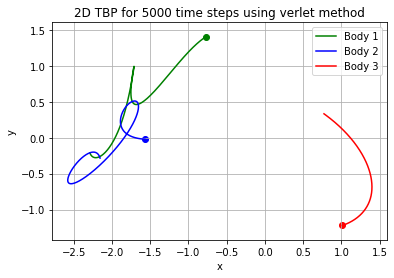

In [14]:
print("\nPositions:")
print("Body 1: " + str(x1) + ", " + str(y1))
print("Body 2: " + str(x2) + ", " + str(y2))
print("Body 3: " + str(x3) + ", " + str(y3) + "\n")

print("Velocities:")
print("Body 1: " + str(vx1) + ", " + str(vy1))
print("Body 2: " + str(vx2) + ", " + str(vy2))
print("Body 3: " + str(vx3) + ", " + str(vy3) + "\n")

print("Total energy of the system: " + str(get_energy(x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3, M, G)))
print("Trajectories approved: " + str(check(x,y)))
plot(x,y)

This cell checks if some of the bodies went too far out. We discard such cases mainly because we need small values for our training data

In [13]:
def check(x,y):
    threshold = 6
    if np.amax(x) > threshold or np.amin(x) < -threshold or np.amax(y) > threshold or np.amin(y) <- threshold:
        return False
    return True


This cell initializes 12 empty dataframes, each one representing one of our variables

In [15]:
df_x1 = pd.DataFrame()
df_x2 = pd.DataFrame()
df_x3 = pd.DataFrame()

df_y1 = pd.DataFrame()
df_y2 = pd.DataFrame()
df_y3 = pd.DataFrame()

df_vx1 = pd.DataFrame()
df_vx2 = pd.DataFrame()
df_vx3 = pd.DataFrame()

df_vy1 = pd.DataFrame()
df_vy2 = pd.DataFrame()
df_vy3 = pd.DataFrame()

This cell runs 5 simulations and adds them to the dataframes. The values are saved in the following format: the rows represent the time steps and the columns represent the different simulations

In [ ]:
sample_size = 4000
counter = 0
i=3000
while i < sample_size:
    counter += 1

    x1,y1 = get_random_position(0)
    x2,y2 = get_random_position(1)
    x3,y3 = get_random_position(2)

    vx1, vy1, vx2, vy2, vx3, vy3 = get_random_velocities()
    
    x,y,vx,vy = verlet_method(max_t, step, M, G, x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3)


    if check(x,y):

        df_x1[str(i)] = x[:,0]
        df_x2[str(i)] = x[:,1]
        df_x3[str(i)] = x[:,2]

        df_y1[str(i)] = y[:,0]
        df_y2[str(i)] = y[:,1]
        df_y3[str(i)] = y[:,2]

        df_vx1[str(i)] = vx[:,0]
        df_vx2[str(i)] = vx[:,1]
        df_vx3[str(i)] = vx[:,2]

        df_vy1[str(i)] = vy[:,0]
        df_vy2[str(i)] = vy[:,1]
        df_vy3[str(i)] = vy[:,2]

        i += 1

print("Done, accuracy = " + str(1000 / counter))

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This cell saves the dataframes into csv files in the folder "data"

In [29]:
if not os.path.exists("data4"):
    os.mkdir("data4")
    

df_x1.to_csv(r'/content/drive/MyDrive/NNs_data/data4/x1.csv')
df_x2.to_csv(r'/content/drive/MyDrive/NNs_data/data4/x2.csv')
df_x3.to_csv(r'/content/drive/MyDrive/NNs_data/data4/x3.csv')
df_y1.to_csv(r'/content/drive/MyDrive/NNs_data/data4/y1.csv')
df_y2.to_csv(r'/content/drive/MyDrive/NNs_data/data4/y2.csv')
df_y3.to_csv(r'/content/drive/MyDrive/NNs_data/data4/y3.csv')
df_vx1.to_csv(r'/content/drive/MyDrive/NNs_data/data4/vx1.csv')
df_vx2.to_csv(r'/content/drive/MyDrive/NNs_data/data4/vx2.csv')
df_vx3.to_csv(r'/content/drive/MyDrive/NNs_data/data4/vx3.csv')
df_vy1.to_csv(r'/content/drive/MyDrive/NNs_data/data4/vy1.csv')
df_vy2.to_csv(r'/content/drive/MyDrive/NNs_data/data4/vy2.csv')
df_vy3.to_csv(r'/content/drive/MyDrive/NNs_data/data4/vy3.csv')

#Data Reader

In [17]:
def get_df(name, dir):
    return pd.read_csv(r'/content/drive/MyDrive/NNs_data/' + dir + '/' + name + '.csv')

In [18]:
dfs1 = [get_df('x1', 'data1'), get_df('x2', 'data1'), get_df('x3', 'data1'),
        get_df('y1', 'data1'), get_df('y2', 'data1'), get_df('y3', 'data1'),
        get_df('vx1', 'data1'), get_df('vx2', 'data1'), get_df('vx3', 'data1'),
        get_df('vy1', 'data1'), get_df('vy2', 'data1'), get_df('vy3', 'data1')]

In [19]:
dfs2 = [get_df('x1', 'data2'), get_df('x2', 'data2'), get_df('x3', 'data2'),
        get_df('y1', 'data2'), get_df('y2', 'data2'), get_df('y3', 'data2'),
        get_df('vx1', 'data2'), get_df('vx2', 'data2'), get_df('vx3', 'data2'),
        get_df('vy1', 'data2'), get_df('vy2', 'data2'), get_df('vy3', 'data2')]

In [20]:
dfs3 = [get_df('x1', 'data3'), get_df('x2', 'data3'), get_df('x3', 'data3'),
        get_df('y1', 'data3'), get_df('y2', 'data3'), get_df('y3', 'data3'),
        get_df('vx1', 'data3'), get_df('vx2', 'data3'), get_df('vx3', 'data3'),
        get_df('vy1', 'data3'), get_df('vy2', 'data3'), get_df('vy3', 'data3')]

In [21]:
dfs4 = [get_df('x1', 'data4'), get_df('x2', 'data4'), get_df('x3', 'data4'),
        get_df('y1', 'data4'), get_df('y2', 'data4'), get_df('y3', 'data4'),
        get_df('vx1', 'data4'), get_df('vx2', 'data4'), get_df('vx3', 'data4'),
        get_df('vy1', 'data4'), get_df('vy2', 'data4'), get_df('vy3', 'data4')]

This joins the data frames, Imma finish it later

In [29]:
x1_all = dfs1[0].set_index('Unnamed: 0').join(dfs2[0].set_index('Unnamed: 0'))